<a href="https://colab.research.google.com/github/lintabong/AntiThieftApp/blob/master/Custom-Model-MaskRCNN/eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

In [3]:
dir               = '/content/drive/MyDrive/Mask_R-CNN/mask3/evaluation_images/'
eval_target       = 'bear_front'
first_image       = 'r-0-1.png'
ground_truth_file = 'bear_front.txt'

eval_target = dir + eval_target + '/'
combine_file = dir + ground_truth_file
scan_first = eval_target + first_image

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

import os
os.chdir('Mask_RCNN/samples')

import sys
import random
import math
import cv2
import numpy as np
from numpy.linalg import norm
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
from scipy import spatial
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [5]:
# Open ground truth
with open(combine_file) as f:
 lines = f.read().splitlines()

print("jumlah baris:", len(lines))

arr_axes = []

for i in range(len(lines)):
  if lines[i].split(',')[0] != 'NaN':
    x = int(lines[i].split(',')[0])
    y = int(lines[i].split(',')[1])
    w = int(lines[i].split(',')[2])
    h = int(lines[i].split(',')[3])

  curr_arr = [x, y, w, h]
  arr_axes.append(curr_arr)

print(arr_axes)

jumlah baris: 281
[[178, 162, 121, 156], [178, 159, 121, 156], [178, 155, 121, 156], [179, 153, 121, 156], [180, 145, 121, 156], [180, 144, 121, 156], [180, 137, 121, 156], [180, 134, 121, 156], [174, 134, 121, 156], [171, 134, 121, 156], [171, 140, 121, 156], [171, 143, 121, 156], [165, 156, 121, 156], [165, 157, 121, 156], [159, 163, 121, 156], [156, 164, 121, 156], [150, 164, 121, 156], [141, 169, 121, 156], [131, 173, 121, 156], [120, 182, 121, 156], [110, 192, 121, 156], [110, 195, 121, 156], [101, 207, 121, 156], [103, 209, 121, 156], [103, 210, 121, 156], [112, 207, 112, 159], [117, 203, 112, 159], [122, 199, 112, 159], [131, 199, 110, 157], [135, 199, 110, 157], [146, 200, 108, 155], [153, 199, 108, 155], [160, 199, 106, 150], [164, 199, 106, 150], [169, 197, 106, 150], [174, 195, 106, 150], [179, 195, 105, 133], [191, 195, 109, 122], [191, 195, 110, 83], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65], [199, 197, 103, 65]

In [6]:
# Mencari jumlah gambar
list_img = os.listdir(eval_target)
number_files = len(list_img)
print("jumlah gambar:", number_files)

for r, d, f in os.walk(eval_target):
  print(f)

arrimg = []
final_arrimg = [""]*len(f)

for i in range(len(f)):
  nameimg = f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 5:
    nameimg = "00" + f[i].split('-')[2]
  if len(f[i].split('-')[2]) == 6:
    nameimg = "0" + f[i].split('-')[2]

  arrimg.append(nameimg)

sorted_arrimg =sorted(arrimg)
print(sorted_arrimg)

for i in range(len(arrimg)):
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] == "0":
    get_val = sorted_arrimg[i][2:7]
    sorted_arrimg[i] = get_val
  if sorted_arrimg[i][0] == "0" and sorted_arrimg[i][1] != "0":
    get_val = sorted_arrimg[i][1:7]
    sorted_arrimg[i] = get_val

print(sorted_arrimg)

# Final Index
for i in range(len(sorted_arrimg)):
  for o in range(len(f)):
    if sorted_arrimg[i] == f[o].split('-')[2]:
      final_arrimg[i] = f[o]

print(final_arrimg)

jumlah gambar: 295
['r-500072-11.png', 'r-533410-12.png', 'r-333381-8.png', 'r-133353-4.png', 'r-433396-10.png', 'r-600086-13.png', 'r-33338-2.png', 'r-100014-3.png', 'r-300043-7.png', 'r-233367-6.png', 'r-200029-5.png', 'r-400058-9.png', 'r-0-1.png', 'r-733439-16.png', 'r-1166834-24.png', 'r-900129-19.png', 'r-1033482-21.png', 'r-1133496-23.png', 'r-1066820-22.png', 'r-700101-15.png', 'r-833453-18.png', 'r-1233511-25.png', 'r-966806-20.png', 'r-800115-17.png', 'r-633424-14.png', 'r-1633568-33.png', 'r-1333525-27.png', 'r-1433539-29.png', 'r-1266849-26.png', 'r-1566892-32.png', 'r-1366863-28.png', 'r-1733583-35.png', 'r-1533554-31.png', 'r-1833597-37.png', 'r-1466878-30.png', 'r-1766921-36.png', 'r-1666906-34.png', 'r-2066964-42.png', 'r-2033626-41.png', 'r-2133640-43.png', 'r-2166978-44.png', 'r-1933611-39.png', 'r-2433683-49.png', 'r-2400345-48.png', 'r-1866935-38.png', 'r-1966949-40.png', 'r-2233654-45.png', 'r-2300331-46.png', 'r-2333669-47.png', 'r-2900417-58.png', 'r-3000431-60.p

In [ ]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [9]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Single Object Detection

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
3 <class 'numpy.ndarray'>
[[159 174 331 317]
 [150 190 469 630]
 [113 383 152 525]] [78  1  1]


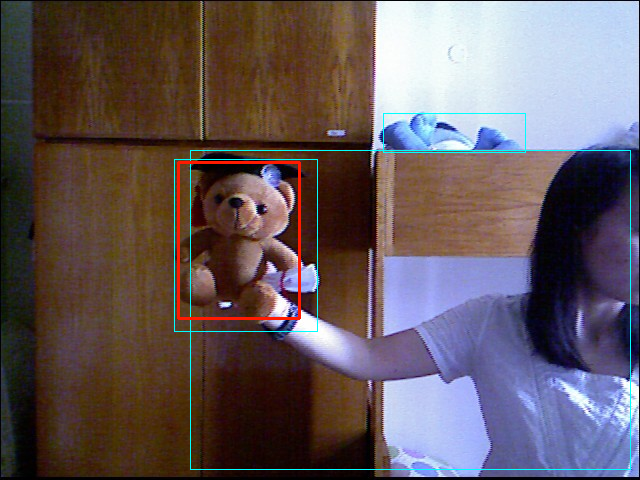

In [30]:
n_img = 0
image = skimage.io.imread(os.path.join(eval_target + final_arrimg[n_img]))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

img = cv2.imread(eval_target + final_arrimg[n_img])

print(len(r['rois']), type(r['rois']))
print(r['rois'], r['class_ids'])

inputClass = 0

for i in range(len(r['rois'])):
  cv2.rectangle(img, (r['rois'][i][1], r['rois'][i][0]), (r['rois'][i][3], r['rois'][i][2]), (255, 255, 0), 1)


cv2.rectangle(img, (arr_axes[n_img][0], arr_axes[n_img][1]), (arr_axes[n_img][2] + arr_axes[n_img][0], arr_axes[n_img][3] + arr_axes[n_img][1]), (0, 26, 255), 2)
cv2_imshow(img)

In [ ]:

n_img = 0
i     = 1

scan_dir  = eval_target + final_arrimg[n_img]

img       = cv2.imread(scan_dir)
imgclean  = cv2.imread(scan_dir)

x_1 = r['rois'][i][1]
y_1 = r['rois'][i][0]
x_2 = r['rois'][i][3]
y_2 = r['rois'][i][2]

crop_1 = imgclean[y_1:y_2, x_1:x_2]

x_1 = arr_axes[n_img][0]
y_1 = arr_axes[n_img][1]
x_2 = arr_axes[n_img][2] + arr_axes[n_img][0]
y_2 = arr_axes[n_img][3] + arr_axes[n_img][1]

crop_2 = imgclean[y_1:y_2, x_1:x_2]

listcrop1 = list(crop_1.ravel())
yy = listcrop1[:100]

listcrop2 = list(crop_2.ravel())
xx = listcrop2[:100]

result = 1 - spatial.distance.cosine(yy, xx)
# print(result)

print(np.dot(yy,xx)/(norm(xx)*norm(yy)))
cv2_imshow(crop_1)
cv2_imshow(crop_2)

# Video Detection

In [91]:
runner = 240
treshold  = 0.4
xx        = 50

axes_export = []
result_axes = []
a = 0
b = 0
c = 0
d = 0

cust_img    = cv2.imread(eval_target + final_arrimg[0])
cut_img     = cust_img[arr_axes[0][1]:arr_axes[0][1]+arr_axes[0][3],arr_axes[0][0]:arr_axes[0][0]+arr_axes[0][2]]

cv2.imwrite('tracker.png', cut_img)

for i in range(len(final_arrimg)-runner):
  print(i+1)

  scan_dir = eval_target + final_arrimg[i]
  image = skimage.io.imread(scan_dir)

  # Run detection
  results = model.detect([image], verbose=1)

  # Visualize results
  r = results[0]

  for o in range(len(r['rois'])):
    y1 = r['rois'][o][1]
    x1 = r['rois'][o][0]
    y2 = r['rois'][o][3]
    x2 = r['rois'][o][2]

    x = x1
    y = y2
    w = x2 - x1
    h = y2 - y1

    buff_axes = [y1, x1, y2, x2]
    result_axes.append(buff_axes)
    
  print(result_axes, r['class_ids'], o + 1)

  # MAIN FUNCTION TRACKING

  img = cv2.imread(eval_target + final_arrimg[i])
  for o in range(len(result_axes)):
    crop = img[result_axes[o][1]:result_axes[o][3],result_axes[o][0]:result_axes[o][2]]
    cv2.imwrite('crop'+ str(o) + '.png', crop)
    # cv2_imshow(crop)
    
  
  for o in range(len(r['rois'])):
    img_track = cv2.imread('crop'+ str(o) + '.png')
    grey_img  = cv2.cvtColor(img_track, cv2.COLOR_BGR2GRAY)

    template = cv2.imread('tracker.png', 0)
    template = cv2.resize(template, (img_track.shape[1], img_track.shape[0]))

    try:
      res = cv2.matchTemplate(grey_img, template, cv2.TM_CCOEFF_NORMED)
      
      loc = np.where(res >= treshold)

      detectio = 0
      for pt in zip(*loc[::-1]):
          detectio = detectio + 1

      print(o, detectio)
      if 1 <= detectio <= xx:
          print("true")
          a = result_axes[o][0]
          b = result_axes[o][1]
          c = result_axes[o][2]
          d = result_axes[o][3]
          break
      else:
          print("false")
    except:
      pass

  # END TRACKING FUNCTION

  for o in range(len(r['rois'])):
    result_axes.pop(0)
  
  for o in range(10):
    try:
      os.remove('crop' + str(o) + '.png')
    except OSError:
      pass
      
  cust_img    = cv2.imread(eval_target + final_arrimg[i])
  cut_img     = cust_img[b:d,a:c]

  cv2.imwrite('tracker.png', cut_img)
  print(a,b,c,d)

  currr_arr = [a, b, c-a, d-b]
  axes_export.append(currr_arr)

  print("=========================================================================================================")

for i in range(len(axes_export)):
  print(i+1, axes_export[i], arr_axes[i])


1
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[174, 159, 317, 331], [190, 150, 630, 469], [383, 113, 525, 152]] [78  1  1] 3
0 1
true
174 159 317 331
2
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[176, 154, 314, 340], [226, 147, 629, 476], [387, 113, 523, 153]] [78  1  1] 3
0 1
tru

In [ ]:
print("output lenght:", len(axes_export))

final_axes = []

for i in range(len(axes_export)):
  x = axes_export[i][0]
  y = axes_export[i][1]
  w = axes_export[i][2] - axes_export[i][0]
  h = axes_export[i][3] - axes_export[i][1]

  curr_arr = [x, y, w, h]
  final_axes.append(curr_arr)

for i in range(len(axes_export)):
  print(list(final_axes[i]), arr_axes[i])

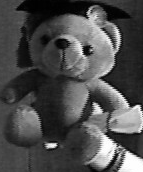

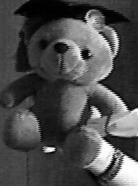

(172, 143)
(186, 138)


error: ignored

In [83]:
img00 = cv2.imread(eval_target + final_arrimg[0])
img11 = cv2.imread(eval_target + final_arrimg[1])
cnn0         = [174, 159, 317, 331]
cnn1         = [176, 154, 314, 340]
img_cnn0     = img00[cnn0[1]:cnn0[3], cnn0[0]:cnn0[2]]
img_cnn1     = img11[cnn1[1]:cnn1[3], cnn1[0]:cnn1[2]]

cv2.imwrite('img_cnn0.png', img_cnn0)
cv2.imwrite('img_cnn1.png', img_cnn1)

grey_ima = cv2.imread('img_cnn0.png')
grey_img = cv2.cvtColor(grey_ima, cv2.COLOR_BGR2GRAY)
template = cv2.imread("img_cnn1.png", 0)

template = cv2.resize(template, (grey_ima.shape[1], grey_ima.shape[0]))


cv2_imshow(grey_img)
cv2_imshow(template)

print(grey_img.shape)
print(template.shape)

res = cv2.matchTemplate(grey_img, template, cv2.TM_CCOEFF_NORMED)

treshold = 0.1
loc = np.where(res >= treshold)

detectio = 0
for pt in zip(*loc[::-1]):
    detectio = detectio + 1

print(detectio)
if 1 <= detectio <= 10:
    print("true")
else:
    print("false")

# **=====================TRIAL CODE===========================**

1 0.06606918660838176


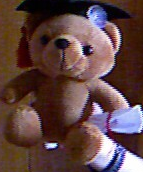

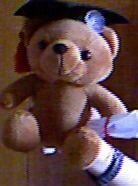

2 0.10999850714357044


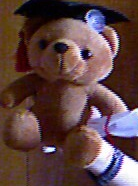

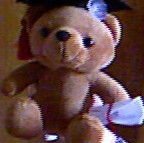

3 0.4507215278760749


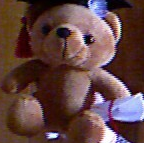

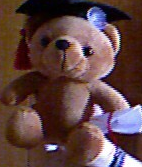

4 0.05034664602799191


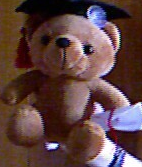

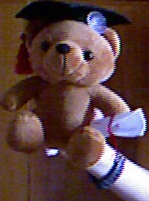

5 0.7837787883780334


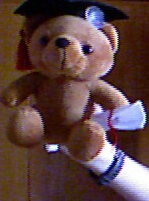

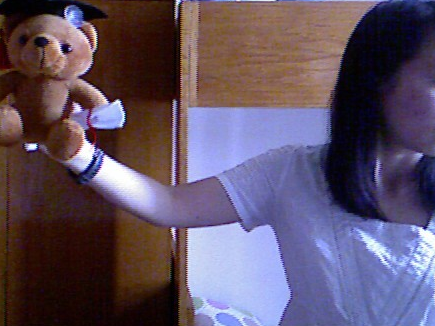

6 10.634944730234704


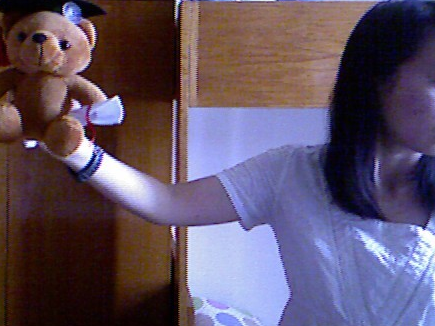

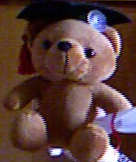

7 2.6295065669268802


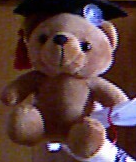

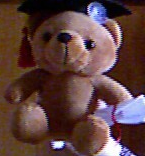

8 5.417317812870963


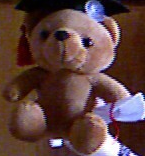

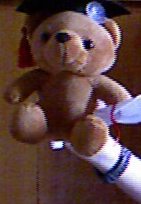

9 5.625131392126467


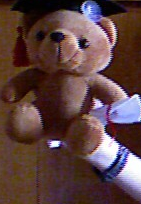

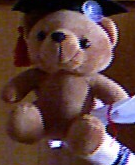

10 0.9121431468575489


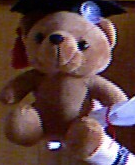

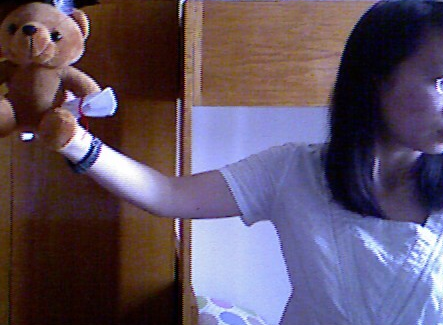

11 15.384425182937497


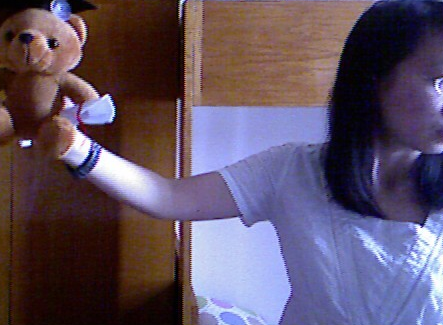

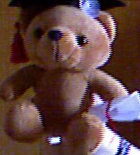

12 0.36904069862528843


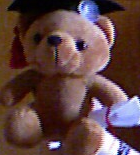

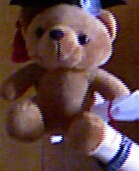

13 1.1025673783414496


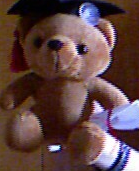

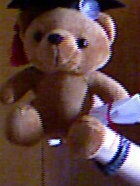

14 0.3625012587323385


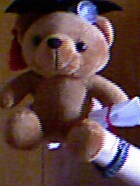

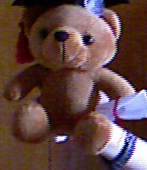

15 0.7296793051079611


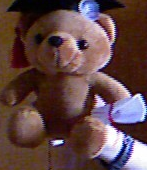

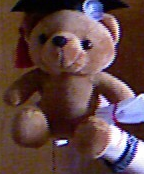

16 0.16221666393819628


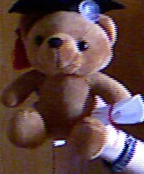

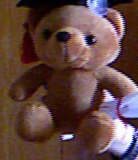

17 0.5918325633439386


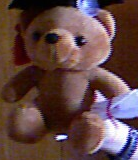

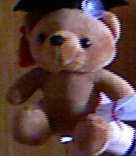

18 0.5963826848960625


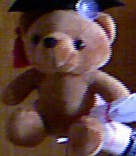

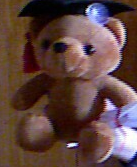

19 0.24577344864949263


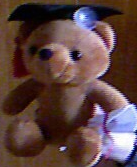

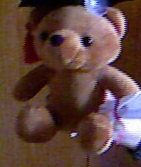

20 0.24950510645388388


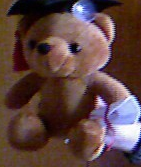

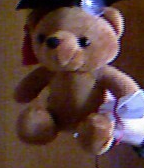

21 0.12216365594245324


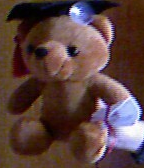

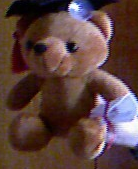

22 0.12203935625305183


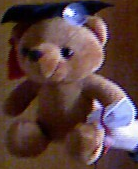

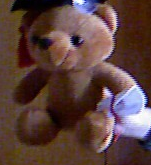

23 0.06915060891984974


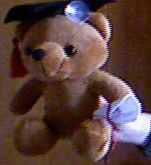

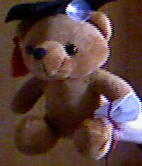

24 0.09244362383430076


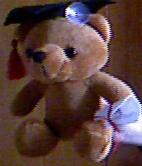

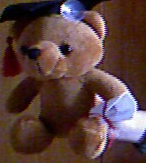

25 0.41299498591659517


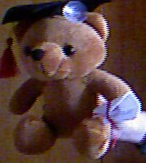

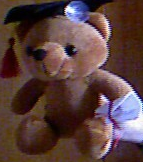

26 0.18150507023574713


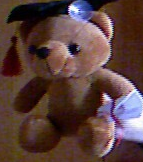

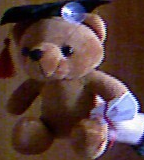

27 0.05174951652266586


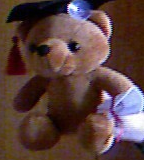

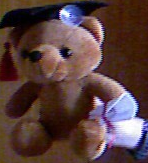

28 0.40020402406352695


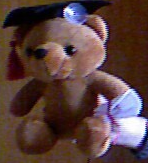

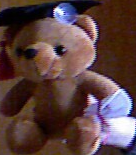

29 0.18602816409779005


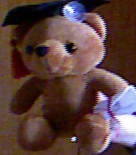

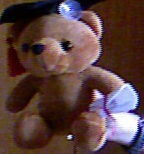

30 0.37693276570910045


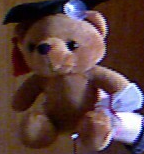

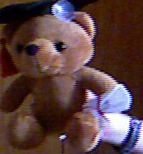

31 0.02045241505740931


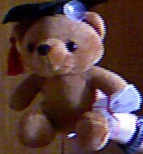

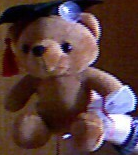

32 0.2585254873442947


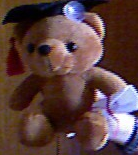

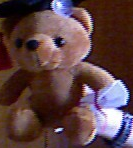

33 0.20070391162558787


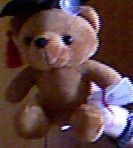

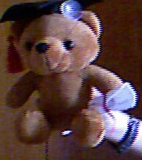

34 0.035982686672142355


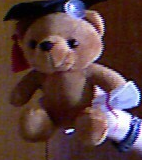

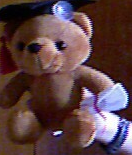

In [ ]:
i = 0
for i in range(len(axes_export) - 1):
  scan_dir  = eval_target + final_arrimg[i]

  img       = cv2.imread(scan_dir)
  imgclean  = cv2.imread(scan_dir)

  x_1 = final_axes[i][0]
  y_1 = final_axes[i][1]
  x_2 = final_axes[i][2] + final_axes[i][0]
  y_2 = final_axes[i][3] + final_axes[i][1]

  cv2.rectangle(img, (x_1, y_1), (x_2, y_2), (0, 255, 26), 2)
  crop_1 = imgclean[y_1:y_2, x_1:x_2]

  x_1 = final_axes[i+1][0]
  y_1 = final_axes[i+1][1]
  x_2 = final_axes[i+1][2] + final_axes[i+1][0]
  y_2 = final_axes[i+1][3] + final_axes[i+1][1]

  cv2.rectangle(img, (x_1, y_1), (x_2, y_2), (0, 0, 255), 2)
  crop_2= imgclean[y_1:y_2, x_1:x_2]


  listcrop1 = list(crop_1.ravel())
  yy = listcrop1[:100]

  listcrop2 = list(crop_2.ravel())
  xx = listcrop2[:100]

  result = np.dot(yy,xx)/(norm(xx)*norm(yy))
  print(i+1, result*1000)
  cv2_imshow(crop_1)



In [ ]:
with open(export_path, 'w') as fp:
  for i in range(len(axes_export)):
    textwriter = str(axes_export[i][0]) + " " + str(axes_export[i][1]) + " " + str(axes_export[i][2]) + " " + str(axes_export[i][3]) + "\n"
    fp.writelines(textwriter)